In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot

import plotly.express as px
import plotly.graph_objs as go


In [2]:
df = pd.read_csv('/ProgramData/Microsoft/Windows/netflix1.csv')
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [3]:
df['type'] = df['type'].astype('category')
df['release_year'] = df['release_year'].astype(int)
df['date_added'] = pd.to_datetime(df['date_added'])

In [4]:
duplicate = df[df.duplicated(subset=['title'], keep = False)]
no_dup = duplicate.drop_duplicates(subset= 'title' , keep='first')
df = pd.concat([no_dup, df.drop_duplicates(subset='title', keep = False)])

In [5]:
data = go.Pie(labels=df["type"], values=df['type'].value_counts(), hole=0.4)

layout = {"title": {
    "text": "Types of Movies",
        "x": 0.5,
        "y": 0.9,
    }
}

go.Figure(data=data, layout=layout)

In [6]:
type_rating	 = df["rating"].value_counts()

fig = px.bar(data_frame=type_rating, 
             x = type_rating.index, 
             y = type_rating, 
             color = type_rating.index,
             text_auto= True,
             title= "Rating Ratios",
             labels = {
                    "y" : "Frequency",
                    "index" : "Rating"
                }
            )

# Custom Format of numbers
fig.update_traces(insidetextfont = {
    "family": "consolas",
    "size": 15,
    
})

iplot(fig)

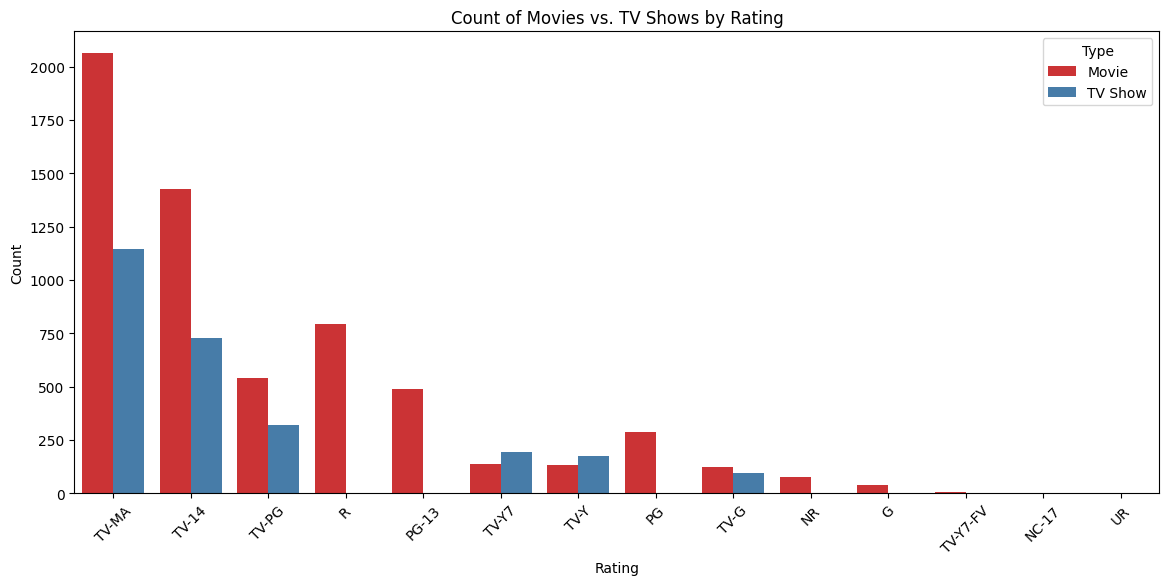

In [7]:
plt.figure(figsize=(14, 6))
sns.countplot(x='rating', hue='type', data=df, order=df['rating'].value_counts().index, palette='Set1')
plt.title('Count of Movies vs. TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1276\897233241.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




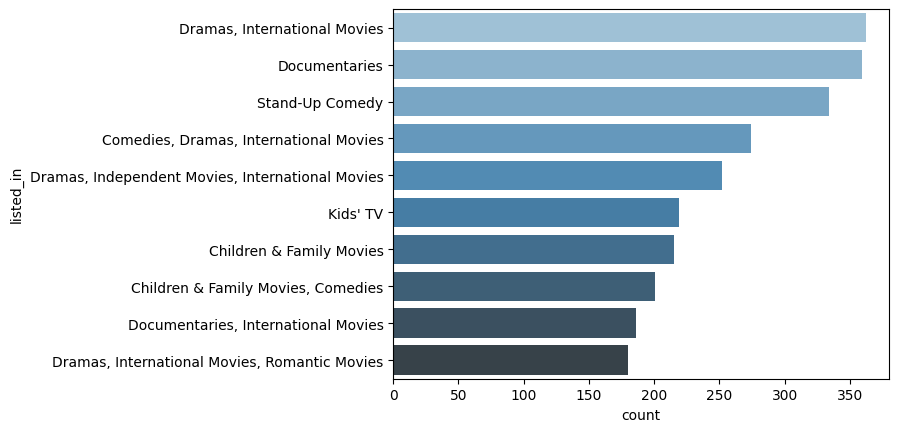

In [8]:
sns.barplot(data=df["listed_in"].value_counts().head(10).reset_index(), x=df["listed_in"].value_counts().head(10).reset_index()["count"],y=df["listed_in"].value_counts().head(10).reset_index()["listed_in"],palette='Blues_d')
plt.show()

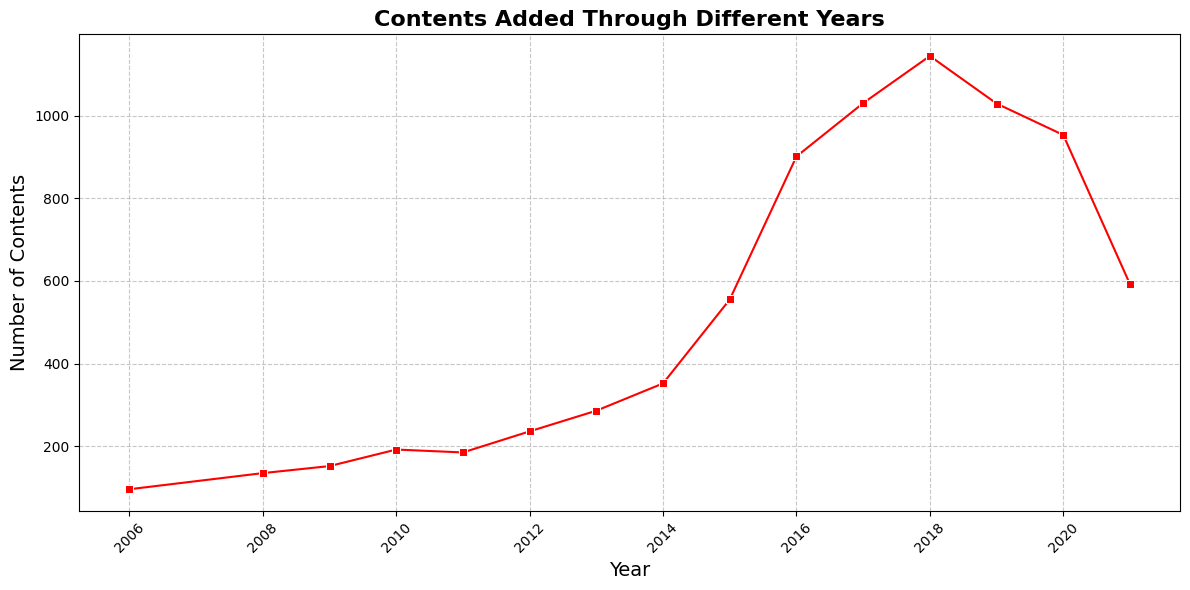

In [9]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=df['release_year'].value_counts().head(15).index, y=df['release_year'].value_counts().head(15).values, 
             alpha=1, color="red", marker='s')

# Add title and labels
plt.title('Contents Added Through Different Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Contents', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


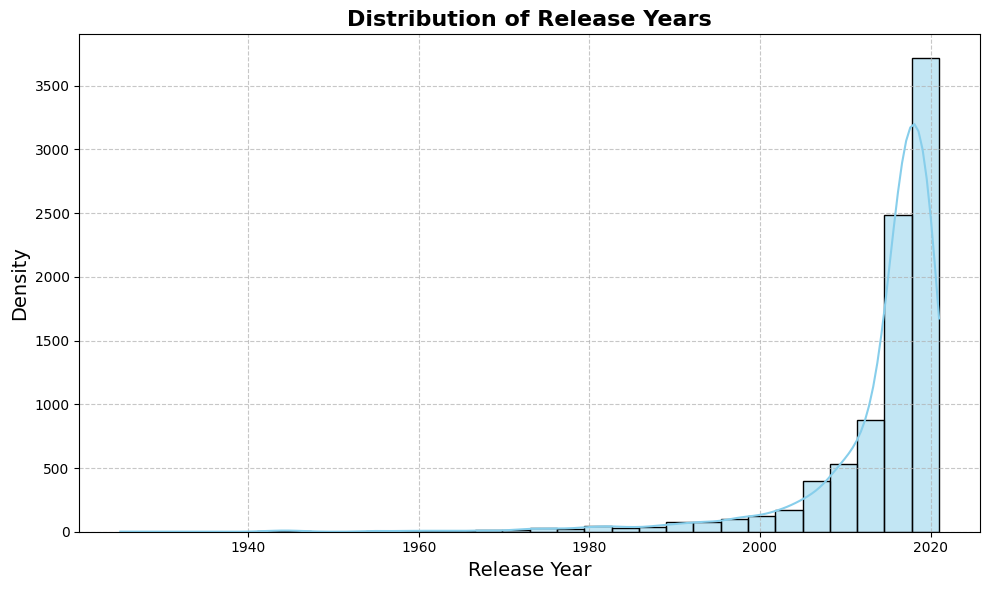

In [10]:
plt.figure(figsize=(10, 6))

sns.histplot(df['release_year'], kde=True, bins=30, color='skyblue')

plt.title('Distribution of Release Years', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1276\3231518315.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Count of Movies by Duration')

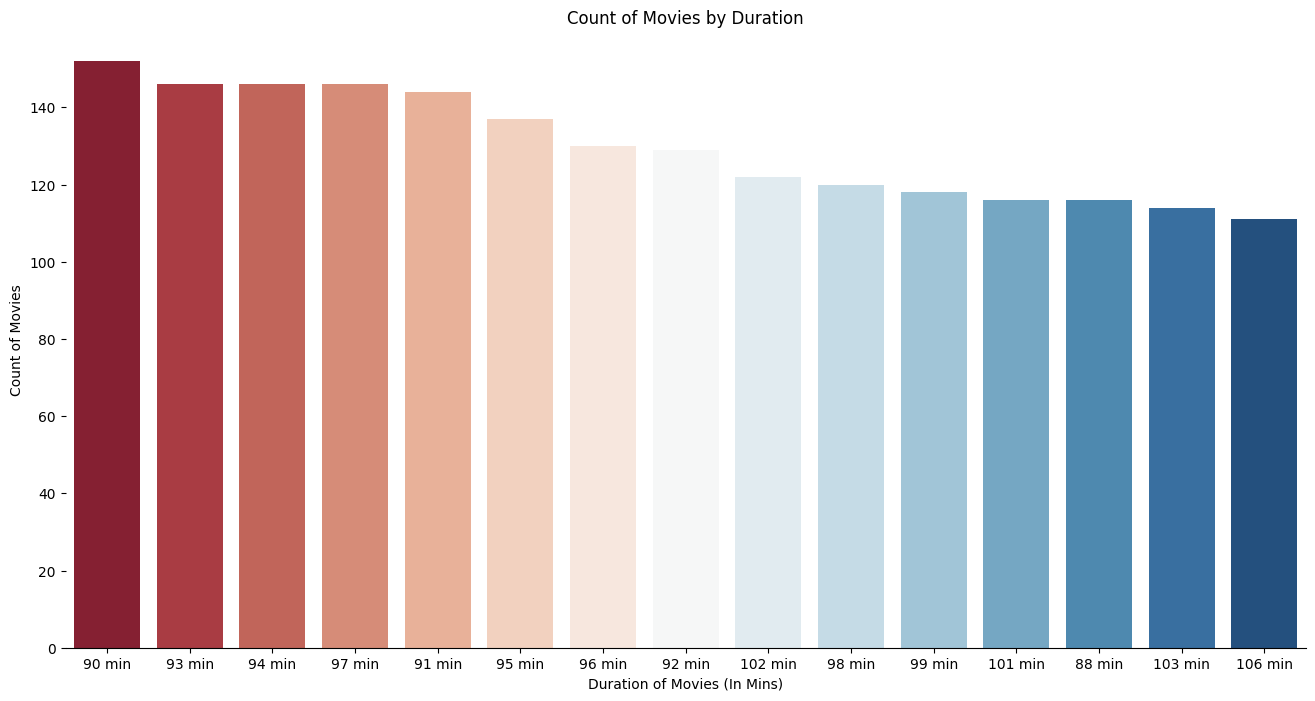

In [11]:
df_movie = df[df['type'] == 'Movie']
df_tvshows = df[df['type'] == 'TV Show']
df_md = df_movie.groupby('duration').count().reset_index().sort_values(ascending=False,by='type')[0:15]
df_md
plt.figure(figsize=(16,8))
df_md = df_movie.groupby('duration').count().reset_index().sort_values(ascending=False,by='type')[0:15]
sns.barplot(data = df_md, x='duration', y='show_id', order=df_md['duration'], palette='RdBu')
sns.despine(left=True)
plt.ylabel('Count of Movies')
plt.xlabel('Duration of Movies (In Mins)')
plt.title('Count of Movies by Duration')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1276\384395456.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



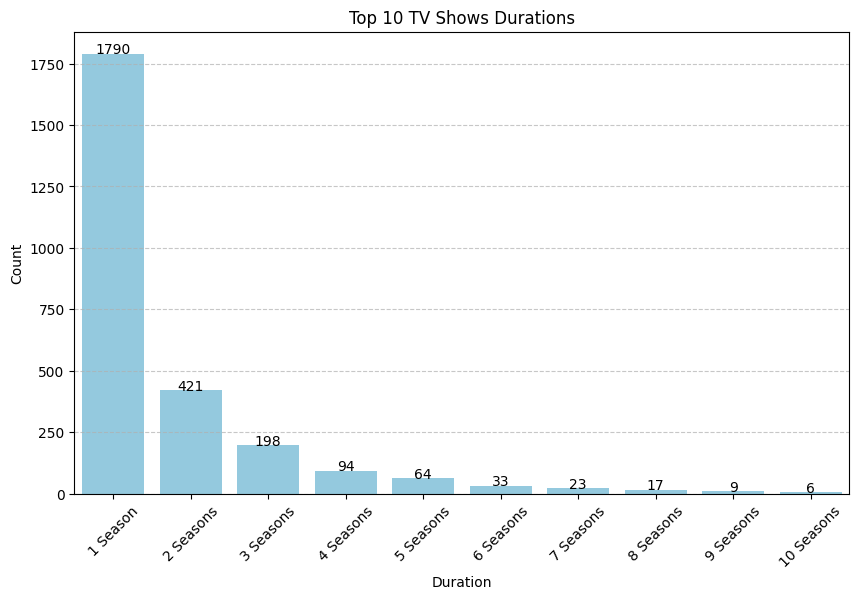

In [13]:
durations = df.groupby(['duration', 'type'])['duration'].value_counts().reset_index()
top_10_TV_Show_durations = durations[durations['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[0:10]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_TV_Show_durations, x='duration', y='count', color='skyblue')
plt.title('Top 10 TV Shows Durations')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for index, value in enumerate(top_10_TV_Show_durations['count']):
    plt.text(index, value + 0.1, str(value), ha='center')

plt.show()


In [14]:

filtered_df = df[df['country'] != 'Not Given']

# Split the country column into multiple rows
filtered_countries = filtered_df['country'].str.split(',', expand=True).stack()

# Remove whitespace and N/A values
filtered_countries = filtered_countries.str.strip().replace('', pd.NA).dropna()

filtered_countries_df = filtered_countries.to_frame()
filtered_countries_df.columns = ['country']

country_counts = filtered_countries_df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'Total Content']
country_counts = country_counts.sort_values(by='Total Content', ascending=False)
top_10_countries = country_counts.head(10)

top_10_countries = top_10_countries.sort_values(by='Total Content')

fig = px.bar(top_10_countries, x='Total Content', y='country', 
             title='Top 10 Countries with Netflix Content')
fig.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1276\574678891.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



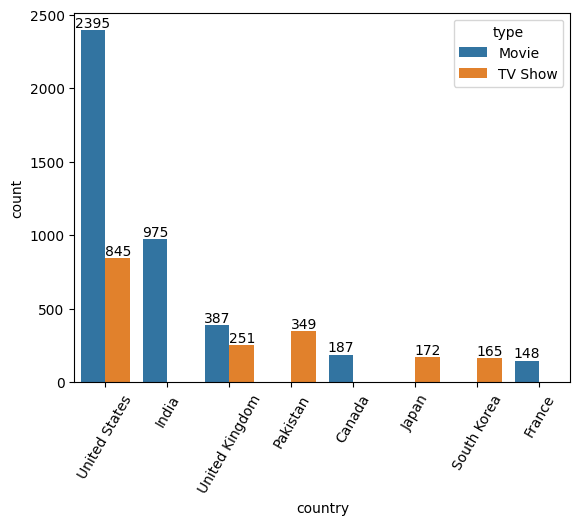

In [15]:
filtered_df = df[df['country'] != 'Not Given']
ax=sns.barplot(data=filtered_df.groupby(["type"])["country"].value_counts().reset_index().sort_values(by="count",ascending=False).head(10),x="country",y="count",hue="type")
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=60)
plt.show()